In [2]:
import pandas as pd
import matplotlib
%matplotlib inline

 ### Ok folks lets do some drug..... data analysis

Data is brought to you buy FiveThirtyEight.com 

Here is the article they wrote about the data

https://fivethirtyeight.com/features/how-baby-boomers-get-high/

In [3]:
drug_use = pd.read_csv('https://raw.githubusercontent.com/resbaz/data/master/drug-use-by-age/drug-use-by-age.csv')

In [4]:
drug_use.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### What kinds of drugs are we doing.... analysis on?

In [5]:
drug_use.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [6]:
drug_use['cocaine-frequency']

0      5.0
1      1.0
2      5.5
3      4.0
4      7.0
5      5.0
6      5.0
7      5.5
8      8.0
9      5.0
10     5.0
11     6.0
12     5.0
13     8.0
14    15.0
15    36.0
16       -
Name: cocaine-frequency, dtype: object

In [7]:
# saw some objects in there so going to force them to by floats
for column in list(drug_use.columns)[2:]:
    drug_use[column] = pd.to_numeric(drug_use[column],errors = 'coerce')

In [8]:
drug_use.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [9]:
an_epic_party = ['alcohol',
                 'marijuana',
                 'cocaine',
                 'crack',
                 'heroin',
                 'hallucinogen',
                 'inhalant',
                 'pain-releiver',
                 'oxycontin',
                 'tranquilizer',
                 'stimulant',
                 'meth',
                 'sedative']

## Let's plot my favorite

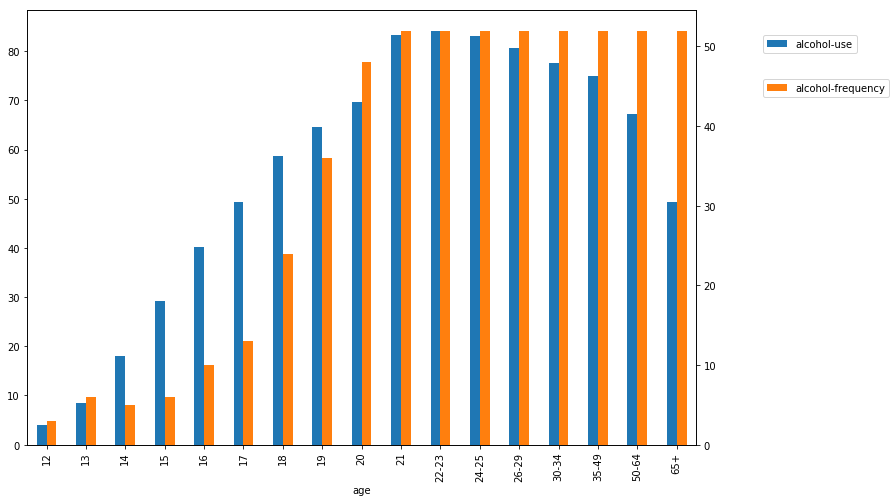

In [10]:
# Note thatyou can use the plotting routines to make a matplotlib axis object to work with down the line
ax = drug_use.plot(kind = 'bar',x = 'age',y = ['alcohol-use','alcohol-frequency'],
              secondary_y= ['alcohol-frequency'], figsize = (12,8))
# Note these are movign the legends off the chart
ax.legend(loc = (1.1,0.9))
ax.right_ax.legend(loc=(1.1,0.8))

### I love Panda's one line plotting functionality, but say we want to mix our drug....analyses, we wouldn't want to write a line for each of those (especially if we have tons of columns or plotting options)
- All  we have to do is put our plotting into a function

In [11]:
def drug_plot(drug = 'alcohol', drug_use = drug_use):
    '''
    Plotting function to plot the frequency and use of one
    '''
    du = drug+'-use' # just creating the column names from the drug input
    df = drug+'-frequency'
    ax = drug_use.plot(kind = 'bar',x = 'age',y = [du,df],
              secondary_y= [df], figsize = (12,8))
    # Note these are movign the legends off the chart
    ax.legend(loc = (1.1,0.9))
    ax.right_ax.legend(loc=(1.1,0.8))
    ax.set_ylabel(du.replace('-',' ')+' metric')
    ax.right_ax.set_ylabel(df.replace('-',' ')+' metric')
    

### Meet Ipywidget function called interact

```python

interact(function_you_want_to_interact_with, parameter1=[list or range of possible inputs], parameter 2 =.....)
```

In [12]:
from ipywidgets import interact, fixed
# all we need to do is specify here what function we are interacting with
interact(drug_plot, drug = an_epic_party, drug_use = fixed(drug_use))

interactive(children=(Dropdown(description='drug', options=('alcohol', 'marijuana', 'cocaine', 'crack', 'heroin', 'hallucinogen', 'inhalant', 'pain-releiver', 'oxycontin', 'tranquilizer', 'stimulant', 'meth', 'sedative'), value='alcohol'), Output()), _dom_classes=('widget-interact',))

<function __main__.drug_plot>

### In conclusion, With one line of code, you can turn your Jupyter notebook into an interactive dashboard
 - and I have found it very useful for cycling through variables in multivariate datasets
 - and working through code with Luddit supervisors